# Visualizing word embeddings with PCA

This code demonstrates how to visualize word embeddings by reducing high-dimensional word vectors to 2D using PCA (Principal Component Analysis). The words are processed using SpaCy’s pre-trained model, and their vector representations are plotted on a scatter plot to show their relationships. Words that are semantically similar will appear closer together, while words with less similarity will be farther apart.
In this example, we are visualizing a set of five words: "horses", "dogs", "cows", "cats", and "professor". The resulting plot gives us a 2D representation of how these words relate to one another based on their meanings in a vector space.

Steps:
Load the pre-trained SpaCy model.
Extract word vectors for each word in the list.
Apply PCA to reduce the word vectors to two dimensions.
Plot the reduced vectors on a scatter plot, labeling each word.
Run the code to see how different words are positioned in the 2D space!

In [ ]:
!python3 -m spacy download en_core_web_md ## if you dont have the model yet, please download it

In [7]:
import spacy  # Importing SpaCy for Natural Language Processing
import matplotlib.pyplot as plt  # Importing matplotlib for visualization (graphs, plots)
from sklearn.decomposition import PCA  

In [8]:
# Load the pre-trained 'en_core_web_md' SpaCy model, which helps us understand word meanings and relationships
nlp = spacy.load("en_core_web_md")

# Let's pick some funny and diverse words to analyze
# Because who doesn't want to compare animals and a professor in the same space?
words = ["horses", "dogs", "cows", "cats", "professor", "teacher", "student"]

# Create vectors for each word using SpaCy's word embedding model (turns words into multi-dimensional vectors)
vectors = [nlp(word).vector for word in words]

# Print out the word vectors
print("Word Vectors:")
for i, word in enumerate(words):
    print(f"\n{word} vector: {vectors[i]}")  # Print the vector for each word

Word Vectors:

horses vector: [-1.7889    1.3251   -3.4022   -0.58188   2.8042    1.3991   -0.89601
  6.0305    0.32193   3.2272    1.7377    0.41735  -1.3104    3.1186
  2.5939   -0.44517   3.439    -2.2089   -0.46766  -5.665    -1.0328
  2.452     2.5702   -4.5706    2.5183    2.1094   -2.3164   -0.56392
  1.537    -1.4593   -0.14739  -0.79649  -0.31407  -5.2896    2.2209
 -2.4991    0.45204   2.9956    0.86361  -1.4223    0.5323    3.4982
  2.9194    5.3339   -5.2444   -1.8546   -1.3309   -1.5735    1.2795
  0.45796   2.1833    4.665     0.39559  -2.6195   -1.1903   -1.3586
 -0.7563   -0.8455    3.4548    0.58337  -4.2976   -3.2974    2.6292
  1.649     2.5564    0.26119  -1.5205   -0.63478  -0.22908  -1.645
  2.0743    2.3822   -0.60878   0.10064   2.2049    0.74424  -3.1034
  2.0292   -2.308     0.71922  -4.5306    2.9938   -1.0167    0.36751
  1.7393   -1.7303   -0.40219  -1.0252   -1.5598    2.4188   -1.7994
 -4.4637    1.208    -3.3793    0.018876 -3.8283   -1.8654   -1.1874
  

In [ ]:
# Now, let's reduce the complexity of these word vectors to 2D so we can plot them
# PCA is a method that takes high-dimensional data and projects it onto a 2D space for easy visualization
pca = PCA(n_components=2)  # We're only interested in two components (2D projection)
reduced_vectors = pca.fit_transform(vectors)

# Plot the 2D representation of the words (our new "word cloud", if you will)
plt.figure(figsize=(6,4))  # Set up the figure size for the plot

# Loop through each word and its reduced vector to plot the points on a 2D plane
for i, word in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=word)  # Plot the word as a point
    # Add text labels next to each point for clarity (this makes it look like a fancy scatter plot)
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1], word, fontsize=12)

# Adding a title and legend to the plot for better understanding
plt.title("Word embeddings projection: animals vs. professor")
plt.legend()  # This shows which point corresponds to which word
plt.show()  # Finally, display the plot


# Exploring sentence embeddings
In this experiment, we’ll explore how to visualize the semantic relationships between different sentences by using sentence embeddings. Embedding sentences involves representing them as vectors (numerical representations) in a high-dimensional space, where each vector captures the meaning of the sentence.

To do this, we use SpaCy, a popular natural language processing library. It converts each word in a sentence into a vector and we combine these word vectors by averaging them to get a sentence-level vector. This allows us to map entire sentences into a vector space.

We will then apply Principal Component Analysis (PCA) to reduce these high-dimensional vectors to just 2D, so that we can easily visualize and analyze their relationships. In the 2D space, sentences with similar meanings will be located close to each other, while sentences with different meanings will appear further apart.

By visualizing sentence embeddings, we can explore how similar or different the sentences are, and even observe how subtle changes in meaning affect their placement in the vector space.



In [9]:
# List of sentences to analyze
sentences = [
    "I love programming.",
    "The cat sat on the mat.",
    "I hate doing homework.",
    "Dogs are very loyal animals.",
    "The professor explained the theory in class."
]

# Function to get sentence embeddings by averaging word vectors
def get_sentence_vector(sentence):
    doc = nlp(sentence)
    return doc.vector  # returns the vector representation of the sentence

# Get the embeddings for each sentence
sentence_vectors = [get_sentence_vector(sentence) for sentence in sentences]

# Print out the sentence vectors
print("\nSentence Vectors:")
for i, sentence in enumerate(sentences):
    print(f"\n{sentence} sentence vector: {sentence_vectors[i]}")  # Print the vector for each sentence



Sentence Vectors:

I love programming. sentence vector: [-0.40126354 -2.366765   -3.192175   -4.7136173  -0.5917299   0.7194425
  2.2064924   4.06585    -4.2250547   2.1847749   5.7385254   1.701
 -2.9595048   1.45225     3.336225   -1.7281001   1.48489    -5.119325
 -2.8634748  -0.5934751   3.01131     2.4034703   0.32718244 -5.360875
 -1.455425   -2.0159025  -1.606025   -0.11080003 -1.23105     2.49315
 -0.912365   -4.22355    -1.9033749  -0.5005      0.8931103  -0.7202375
 -1.2977     -0.413465    3.0555673   1.7078094  -0.24132508  3.1208599
  0.25611752 -3.514725    0.75514996  3.0222223  -3.306945   -3.7564
  0.22792247  0.75262505 -0.23876    -0.12605011 -0.20063251 -4.137875
 -0.93771267 -0.30609748 -0.60424256  2.3495502   2.160792    2.770125
  4.16905    -1.6116475  -0.24090001 -0.14067    -0.06221747  0.8999475
 -2.4756098  -4.1277      2.0949001   3.6911724  -1.28215     0.71245
  0.48564994 -1.9747599   4.38475     0.84748244 -3.7868252  -0.28975248
 -1.51606    -3.60970

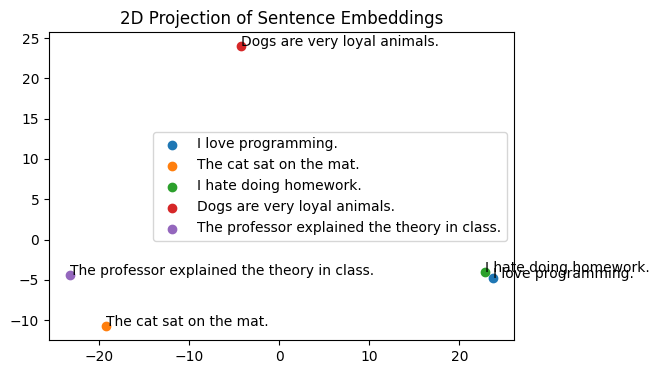

In [10]:
# Use PCA to reduce the sentence vectors to 2D for plotting
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sentence_vectors)

# Create the plot
plt.figure(figsize=(6, 4))

# Loop through the sentences and plot their 2D vectors
for i, sentence in enumerate(sentences):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], label=sentence)
    plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1], sentence, fontsize=10)

# Add labels and title
plt.title("2D Projection of Sentence Embeddings")
plt.legend()
plt.show()